## Social Network Connections

Connections between people (or things) can often be represented with what is called an **Adjacency Matrix**. For example imagine a very very small social network of 7 people. We could represent the connections using the matrix below:

In [ ]:
small_network = Matrix([[ 0, 1, 0, 1, 1, 0, 0 ],
                        [ 1, 0, 0, 1, 0, 0, 0 ],
                        [ 0, 0, 0, 0, 0, 1, 0 ],
                        [ 1, 1, 0, 0, 0, 0, 0 ],
                        [ 1, 0, 0, 0, 0, 0, 1 ],
                        [ 0, 0, 1, 0, 0, 0, 0 ],
                        [ 0, 0, 0, 0, 1, 0, 0 ]])

To interpret this (necessarily symmetric) matrix note that:
 - if position i,j is a 0 then person i and person j are not friends
 - if position i,j is a 1 then person i and person j are friends
 
A slightly more useful visualization would be to draw a bunch of circles for each person with lines in between the connections (also known as a graph). Execute the cell below to see this.

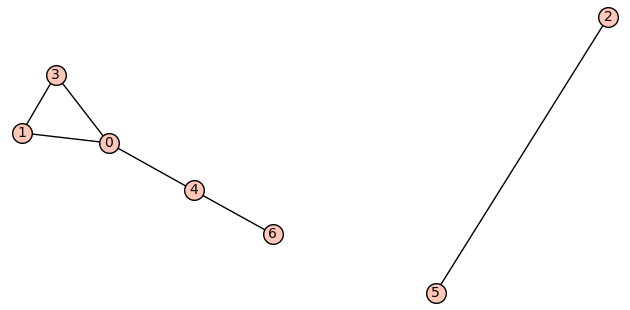

In [ ]:
small_network = Matrix([[ 0, 1, 0, 1, 1, 0, 0 ],
                        [ 1, 0, 0, 1, 0, 0, 0 ],
                        [ 0, 0, 0, 0, 0, 1, 0 ],
                        [ 1, 1, 0, 0, 0, 0, 0 ],
                        [ 1, 0, 0, 0, 0, 0, 1 ],
                        [ 0, 0, 1, 0, 0, 0, 0 ],
                        [ 0, 0, 0, 0, 1, 0, 0 ]])

G = Graph(small_network)
G.plot()

As it turns out, for an adjacency matrix $A$ the i,j entry of $A^n$ will give the number of paths of length $n$ connecting person i and person j. For example let's compute $A^3$ below

In [ ]:
show(small_network^3)

[2 4 0 4 4 0 0]
[4 2 0 3 1 0 1]
[0 0 0 0 0 1 0]
[4 3 0 2 1 0 1]
[4 1 0 1 0 0 2]
[0 0 1 0 0 0 0]
[0 1 0 1 2 0 0]

Notice how the entry at row 1 column 0 is 4. This means that there should be 4 distinct paths of length 3 that go from person 1 to person 0. (Recall for these computer based matrices we start counting at 0 instead of 1).
<div style="background-color: lightpink; color:black; padding: 10px">
    
### Question 1 
    
#### (answer on the Exercise 02 quiz in Learn)
List all of the paths of length 3 from person 1 to person 0 in the network above. They should be entered as (a,b,c,d) where each letter is replaced by a number that corresponds to a person. For example one of the paths of length 3 from person 4 to person 6 would be (4,0,4,6). Another option would be (4,6,4,6).
</div>


Actually drawing out the graph for even a small social network is unfeasible. As such your job will be to deduce properties based on the matrix alone.

Let us build a (slightly larger) social network of 80 people (ensure the file `small_social_network_data.csv` is in the folder where the current `exercise02.ipynb` file is)

Run the code cell below. This should create a variable called large_network which represents the adjacency matrix for this social network.

In [10]:
import csv

filename = 'small_social_network_data.csv'
nodes = 80

large_network = matrix(nodes,nodes,0)

with open(filename, 'r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)  # skip the header
    for row in csv_reader:
        node1, node2 = int(row[0]) - 1, int(row[1]) - 1 
        large_network[node1,node2] = 1
        large_network[node2,node1] = 1
        
#uncomment the line below to see the matrix (i.e. remove the # symbol)
#show(large_network) 

<div style="background-color: lightpink; color:black; padding: 10px">
    
### Question 2
Use the code cell below to help solve the probem. **Then, answer the specific question on the Exercise 02 quiz in Learn**

Q: From the matrix `large_network` use matrix-vector multiplication to determine the largest number of friends someone has in this network. You may wish to use the `max` function (e.g. `max(v)` generates the maximum value of the vector `v`)
</div>

In [12]:
import csv

filename = 'small_social_network_data.csv'
nodes = 80

large_network = matrix(nodes,nodes,0)
one_vector = vector([1]*nodes)

with open(filename, 'r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)  # skip the header
    for row in csv_reader:
        node1, node2 = int(row[0]) - 1, int(row[1]) - 1 
        large_network[node1,node2] = 1
        large_network[node2,node1] = 1
        
friends_vector = large_network * one_vector

show(max(friends_vector)); 

7

---

For the next question you might want to make use of the custom function in the cell below. It will determine if a particular value exists inside a matrix. For example:

if $A = \begin{pmatrix} 2 & 5 \\ -1 & 3 \end{pmatrix}$ then `check_for_val(A,5) => True` whereas `check_for_val(A,4) => False`

Run the cell below so that this function will be available to use in the final question.

In [11]:
def check_for_val(A,val):
    for r in A.rows():
        for c in r:
            if c == val:
                return True
    return False

<div style="background-color: lightpink; color:black; padding: 10px">

### Question 3
Perhaps you've heard of the theory "6 degrees of separation". The idea being that any two people in the world are socially separated from each other by no more than 6 people. That is, in a social network it should be possible for person A to reach person B by a path of length 6 or shorter.

*With that in mind, and using the custom function above, determine if everyone in `large_network` is separated by at most a path of length 6. If not, find the smallest path length that will guarantee everyone is connected (the expectation is that you will brute force your way to the answer and not develop a fancy way of determining this). Consider rereading the beginning of this exercise file.*
</div>

In [14]:
import csv

filename = 'small_social_network_data.csv'
nodes = 80

large_network = matrix(nodes,nodes,0)


with open(filename, 'r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)  # skip the header
    for row in csv_reader:
        node1, node2 = int(row[0]) - 1, int(row[1]) - 1 
        large_network[node1,node2] = 1
        large_network[node2,node1] = 1


n = 1
extension_network = large_network^n

while True:
    # ignore diagonal
    for i in range(extension_network.nrows()):
        extension_network[i,i] = 1

    if not check_for_val(extension_network, 0):
        show(n)
        break

    n += 1
    extension_network += large_network^n


8